### Ejercicio 8


Escribe una función en Python que encuentre los valores de `a`, `b`, y `c` para que la función cuadrática $f(x) = a x^2 + b x + c$ pase exactamente por los siguientes puntos:

| x  | y  |
|---:|---:|
|  0 |  0 |
|  1 |  8 |
|  2 | 12 |
|  3 | 12 |
|  5 |  0 |

### Requisitos:
- La función debe explorar posibles valores de `a`, `b`, y `c` utilizando un método de prueba y error.
- Debe devolver los valores que hagan que la diferencia entre la función `f(x)` y los valores medidos `y` sea exactamente cero para cada punto.

> **Pista**: Los valores de `a`, `b`, y `c` son números pequeños.

La idea es implementar el mismo algoritmo que se uso en el TP1 pero usando NumPy en lugar de Python puro.

In [ ]:
X = [0,1,2,3,5]
Y = [0,8,12,12,0]

def f(x, a, b, c):
    return a*x**2 + b*x + c

def buscar():
    rango = range(-10,11)
    for a in rango:
        for b in rango:
            for c in rango:
                y = [f(x,a,b,c) for x in X]
                if y == Y:
                    return(a,b,c)
coe = buscar()
coe 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0,1,2,3,5])
Y = np.array([0,8,12,10,0])

def f(x, a, b, c):
    return a*x**2 + b*x + c

def error(y,yp):
    return sum((y-yp)**2)

def buscar():
    rango = np.arange(-10,11,0.5)
    
    e = np.inf 
    coe = None 
    
    for a in rango:
        for b in rango:
            for c in rango:
                y = f(X,a,b,c)
                ne = error(Y,y)
                if ne < e:
                    e = ne 
                    coe = np.array([a,b,c])
    print(f"Coefientes: {coe}, error: {e}")
    return coe 

coe = buscar()
print(f"Coeficientes: {coe}")
xr = np.linspace(min(X),max(X),100)
yr = f(xr,*coe)

plt.plot(X,Y,'rx')
plt.plot(xr,yr)
print(np.polyfit(X,Y,2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0,1,2,3,5])
Y = np.array([0,8,12,10,0])

def f(x, a, b, c):
    return a*x**2 + b*x + c

print(f"Coeficientes: {coe}")
xr = np.linspace(min(X),max(X),100)

coe = np.polyfit(X,Y,5)
f = np.poly1d(coe)
yr =  f(xr)

plt.plot(X,Y,'rx')
plt.plot(xr,yr)

Coeficientes (Buscado): [-1.84  9.1   0.37], error: 2.1325500000000055
Coeficientes (Reales ): [ 0.02 -0.04 -0.57 -0.31  8.9  -0.  ]


/var/folders/6n/z412hmln0wn4g5vby875r5s00000gn/T/ipykernel_40045/1793609044.py:33: RankWarning: Polyfit may be poorly conditioned
  rea = np.polyfit(X,Y,5)


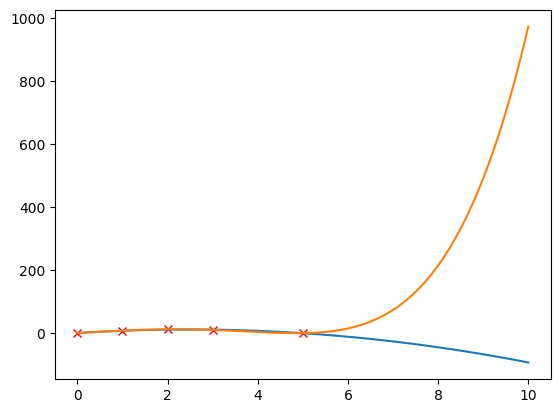

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0,1,2,3,5])
Y = np.array([0,8,12,10,0])

def f(x, a, b, c):
    return a* (x ** 2) + b*(x ** 1) + c * (x ** 0)

def error(y,yp):
    return sum((y-yp)**2)

def buscar():
    rango = np.arange(-10,11,0.5)
    
    e = np.inf 
    coe = np.random.randint(-10,10,3)
    epocas = 0
    VelocidadAprendizaje = 0.001
    while e > 0.1 and epocas < 100000:
        nue = coe + np.random.randint(-10,10,3) * VelocidadAprendizaje
        y = f(X,*nue)
        ne = error(Y,y)
        if ne < e:
            e = ne 
            coe = nue 
            # print(e)
        epocas +=1 
    print(f"Coeficientes (Buscado): {coe.round(2)}, error: {e}")
    return coe 

coe = buscar()
rea = np.polyfit(X,Y,5)
print(f"Coeficientes (Reales ): {rea.round(2)}")
xr = np.linspace(min(X),max(X)*2,100)
yr = f(xr,*coe)

g = np.poly1d(rea)
plt.plot(X,Y,'rx')
plt.plot(xr,yr)
plt.plot(xr, g(xr))

Coeficientes (Buscado): [-1.84  9.1   0.37], error: 2.132547864506625
Coeficientes (Reales): [-1.84  9.1   0.37]


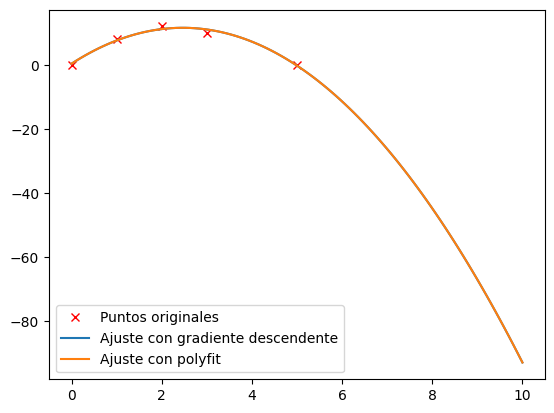

In [28]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 1, 2, 3, 5])
Y = np.array([0, 8, 12, 10, 0])

# Definimos la función polinómica
def f(x, a, b, c):
    return a * (x ** 2) + b * (x ** 1) + c

# Definimos la función de error
def error(y, yp):
    return sum((y - yp) ** 2)

# Algoritmo de búsqueda de los coeficientes
def buscar():
    e = np.inf
    coe = np.random.randint(-10, 10, 3)
    epocas = 0
    VelocidadAprendizaje = 0.0001
    while e > 0.1 and epocas < 1000000:
        y = f(X, *coe)
        
        # Calculamos los gradientes correctamente
        gra = Y - y  # Gradiente con respecto a la predicción
        ga = -2 * sum(gra * X**2)
        gb = -2 * sum(gra * X)
        gc = -2 * sum(gra) 

        # Actualizamos los coeficientes
        coe = coe - np.array([ga, gb, gc]) * VelocidadAprendizaje
        
        # Calculamos el nuevo error
        e = error(Y, y)
        epocas += 1

    print(f"Coeficientes (Buscado): {coe.round(2)}, error: {e}")
    return coe

# Buscamos los coeficientes usando el algoritmo
coe = buscar()

# Usamos la función de ajuste de numpy para comparar
rea = np.polyfit(X, Y, 2)
print(f"Coeficientes (Reales): {rea.round(2)}")

# Generamos los datos para graficar
xr = np.linspace(min(X), max(X) * 2, 100)
yr = f(xr, *coe)

# Creamos el polinomio a partir de los coeficientes reales
g = np.poly1d(rea)

# Graficamos los puntos y las funciones ajustadas
plt.plot(X, Y, 'rx', label='Puntos originales')
plt.plot(xr, yr, label='Ajuste con gradiente descendente')
plt.plot(xr, g(xr), label='Ajuste con polyfit')
plt.legend()
plt.show()